### Data Acquisition & Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WELFake_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
df.shape

(72134, 4)

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71537 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  71537 non-null  int64 
 1   title       71537 non-null  object
 2   text        71537 non-null  object
 3   label       71537 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


In [9]:
## Separate Independent Variable
X = df.drop('label', axis=1)

In [10]:
## Get dependent Variable
y = df['label']

In [11]:
y.value_counts()

,count
label,
1,36509
0,35028


In [12]:
X.shape, y.shape

((71537, 3), (71537,))

### One-hot Representation

In [13]:
#import tensorflow as tf

In [14]:
# tf.__version__

NameError: name 'tf' is not defined

In [15]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [16]:
## Vocabulary Size
voc_size=5000

In [17]:
messages = X.copy()

In [18]:
messages['title'].iloc[1]

'UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]'

In [19]:
messages.head()

,Unnamed: 0,title,text
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...


### **Data Preprocessing**

In [20]:
import nltk
import re
from nltk.corpus import stopwords

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'].iloc[i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
corpus

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video',
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video',
 'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid',
 'satan russia unv imag terrifi new supernuk western world take notic',
 'time christian group sue amazon splc design hate group',
 'dr ben carson target ir never audit spoke nation prayer breakfast',
 'hous intel chair trump russia fake stori evid anyth video',
 'sport bar owner ban nfl game show true american sport like speak rural america video',
 'latest pipelin leak underscor danger dakota access pipelin',
 'gop senat smack punchabl alt right nazi internet',
 'may brexit offer would hurt cost eu citizen eu parliament',
 'schumer call trump appoint offici overse puerto rico relief',
 'watch hilari ad call question health age clinton crime famili boss',
 'chang expect espn polit agenda despit huge subscrib declin breitbart'

In [24]:
corpus[2]

'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid'

In [25]:
onehot_rep = [one_hot(words, voc_size) for words in corpus]
onehot_rep

[[3064, 4139, 4101, 4484, 4850, 1174, 4867, 1319, 84, 631, 3686, 1354],
 [1206,
  1659,
  4911,
  77,
  2608,
  1049,
  2549,
  3229,
  1890,
  1741,
  3693,
  3470,
  3444,
  1354],
 [1418, 2462, 4450, 1921, 3976, 4008, 4525, 1794, 3799, 4816, 3933, 653],
 [1010, 1285, 1542, 2948, 2017, 4777, 1540, 1350, 4960, 3379, 4265],
 [2176, 4525, 2837, 1221, 4705, 1368, 158, 4616, 2837],
 [4516, 4532, 3260, 45, 1531, 2044, 2761, 2936, 4155, 3575, 4991],
 [1177, 4814, 1926, 1948, 1285, 4915, 4008, 182, 300, 1354],
 [406,
  2377,
  1853,
  124,
  959,
  3724,
  2515,
  3635,
  203,
  406,
  3549,
  2946,
  4491,
  2726,
  1354],
 [219, 1492, 2760, 292, 1822, 223, 4856, 1492],
 [1755, 2937, 4406, 2071, 2808, 900, 1576, 3024],
 [4571, 4610, 4618, 3242, 1341, 3733, 585, 3725, 585, 4156],
 [403, 3100, 1948, 4945, 3534, 2557, 2941, 1131, 3949],
 [345, 587, 1056, 3100, 657, 3910, 4306, 4232, 1799, 3078, 1951],
 [2819, 3459, 2141, 2230, 1773, 1487, 2210, 2812, 4437, 2812],
 [196, 4242, 2992, 3837, 1140,

In [26]:
corpus[1]

'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video'

In [27]:
onehot_rep[1]

[1206,
 1659,
 4911,
 77,
 2608,
 1049,
 2549,
 3229,
 1890,
 1741,
 3693,
 3470,
 3444,
 1354]

Embedding Representation

In [28]:
sent_length = 20
embedded_docs = pad_sequences(onehot_rep, padding='pre', maxlen = sent_length)
print(embedded_docs)

[[   0    0    0 ...  631 3686 1354]
 [   0    0    0 ... 3470 3444 1354]
 [   0    0    0 ... 4816 3933  653]
 ...
 [   0    0    0 ... 1805 4095 4289]
 [   0    0    0 ... 3942 3838 2733]
 [   0    0    0 ...  857 4232 4509]]


In [29]:
embedded_docs[1]

array([   0,    0,    0,    0,    0,    0, 1206, 1659, 4911,   77, 2608,
       1049, 2549, 3229, 1890, 1741, 3693, 3470, 3444, 1354], dtype=int32)

In [30]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0, 3064, 4139, 4101,
       4484, 4850, 1174, 4867, 1319,   84,  631, 3686, 1354], dtype=int32)

### Model Building

In [31]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

In [32]:
embedding_vector_features = 50
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features))
model.build(input_shape=(None, sent_length))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 20, 50)         │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,761 (1.07 MB)

 Trainable params: 279,633 (1.07 MB)

 Non-trainable params: 128 (512.00 B)

None


In [34]:
len(embedded_docs), y.shape

(71537, (71537,))

In [35]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [36]:
X_final.shape, y_final.shape

((71537, 20), (71537,))

### Model Training

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True, mode='min', verbose=1)

In [39]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, callbacks=[early_stop])

Epoch 1/20
895/895 ━━━━━━━━━━━━━━━━━━━━ 31s 30ms/step - accuracy: 0.8271 - loss: 0.3663 - val_accuracy: 0.8965 - val_loss: 0.2475
Epoch 2/20
895/895 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.9033 - loss: 0.2344 - val_accuracy: 0.8978 - val_loss: 0.2391
Epoch 3/20
895/895 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9150 - loss: 0.2100 - val_accuracy: 0.8536 - val_loss: 0.3306
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 2.


In [76]:
y_pred = model.predict(X_test)

448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [45]:
from sklearn.metrics import precision_recall_curve, f1_score

y_pred_prob = model.predict(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_prob)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]

print("Best threshold based on F1:", best_threshold)

1789/1789 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step
Best threshold based on F1: 0.41496995


In [77]:
y_pred = np.where(y_pred > 0.6, 1, 0)

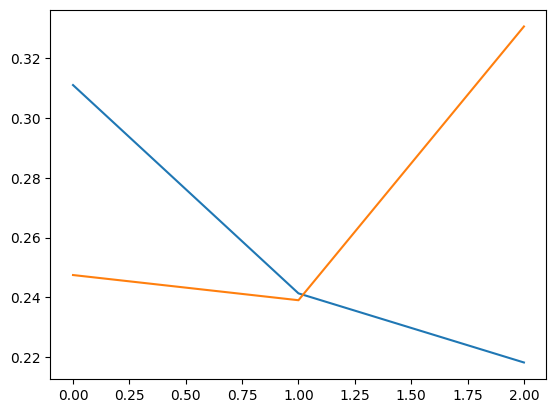

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

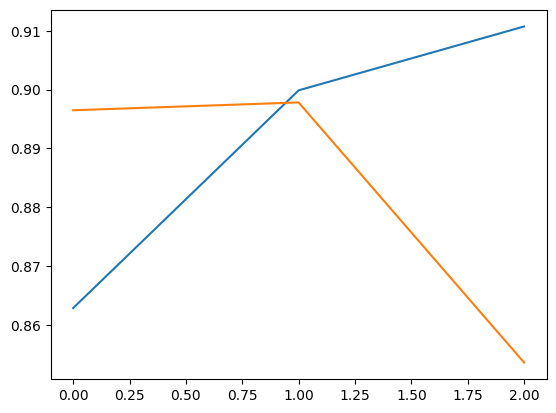

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [79]:
confusion_matrix(y_test, y_pred)

array([[6578,  503],
       [1029, 6198]])

In [80]:
accuracy_score(y_test, y_pred)

0.8929270338272295

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      7081
           1       0.92      0.86      0.89      7227

    accuracy                           0.89     14308
   macro avg       0.89      0.89      0.89     14308
weighted avg       0.90      0.89      0.89     14308

